#### R<sub>LU</sub> = 𝜎𝜀<sub>S</sub>𝑇<sub>S</sub><sup>4</sup>

𝜎 is 5.67 × 10<sup>-8</sup> J s<sup>-1</sup> m<sup>-2</sup> K<sup>-4</sup><br>
𝜀<sub>S</sub> is Emissivity from MOD21A1D<br>
𝑇<sub>S</sub> is AHI LST (℃)

In [1]:
import os
import numpy
import matplotlib.pyplot as plt

In [2]:
def read_site_csv(csv_filename):
    csv_data = numpy.genfromtxt(csv_filename, delimiter=',', dtype=str)
    csv_v = csv_data[:, 1]
    csv_v = csv_v.astype(float)
    return csv_data[:, 0], csv_v


def calculate_r_lu(epsilon_s, t_s):
    sigma = 5.67e-8
    r_lu = sigma * epsilon_s * t_s**4
    return r_lu

In [3]:
site_infos = [# site, lat, lon, UTC+
    ["CLC", 44.59666667, 123.4702778, 8],
    ["JRC", 31.80683056, 119.2172639, 8],
    ["PDC", 26.6, 106.3166667, 8],
    ["PJC", 40.94138889, 121.9602778, 8],
    ["HZF", 51.78111111, 121.0177778, 8],
    ["ZAG", 32.8, 102.55, 8],
    ["DBB", 41.64397222, 110.3314722, 8],
    ["HBG", 37.61666667, 101.3166667, 8],
    ["MPM", 22.4982, 114.0292, 8],
    ["BBY", 43.323, 141.8107, 9],
    ["TKY", 36.14616667, 137.4231111, 9],
    ["CRK", 38.20138889, 127.2505556, 9],
    ["GCK", 37.74833333, 127.1622222, 9],
    ["GDK", 37.74888889, 127.1491667, 9],
    ["SIP", 0.395204167, 102.7645506, 7],
    ["SDP", 0.699491389, 102.793305, 7],
    ["ASM", -22.2828, 133.2493, 9],
    ["CPW", -33.6152, 150.7236, 11],
    ["WAR", -43.095, 146.6545, 11]
]

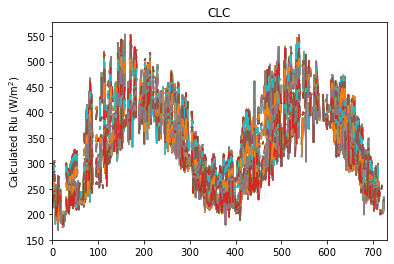

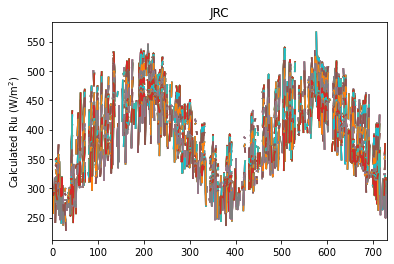

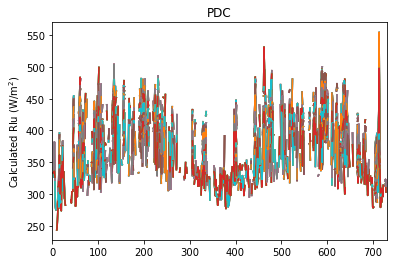

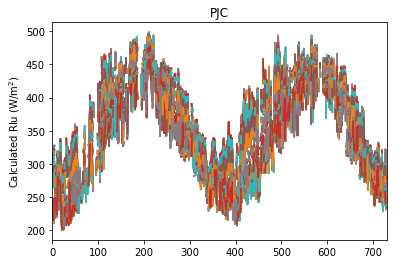

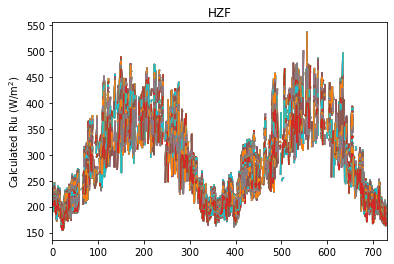

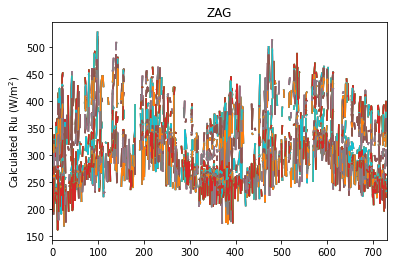

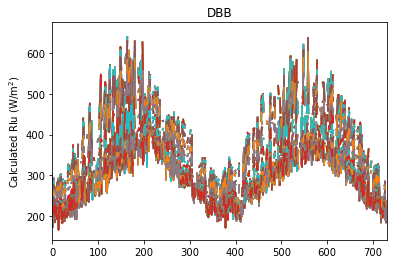

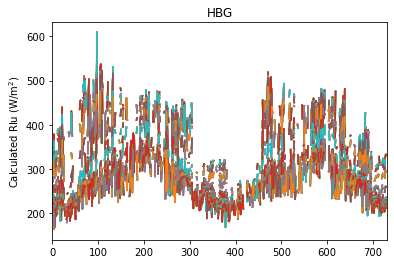

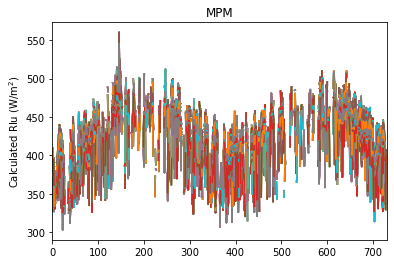

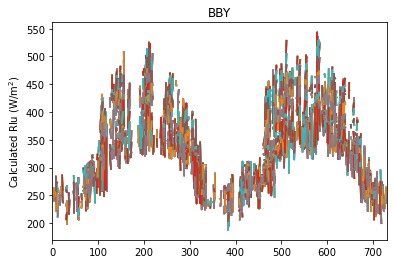

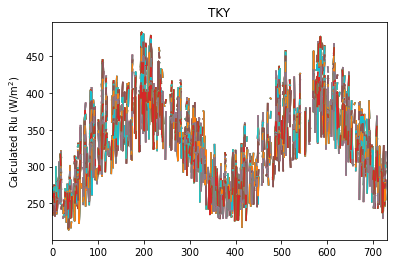

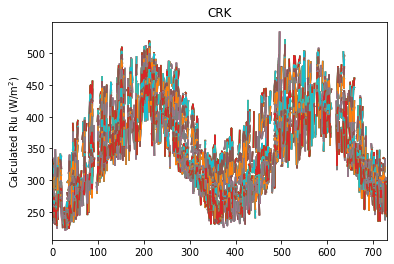

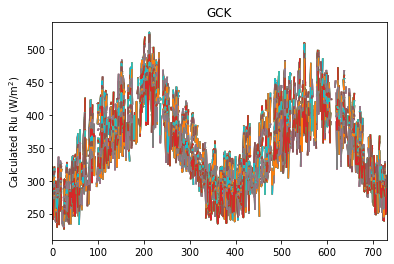

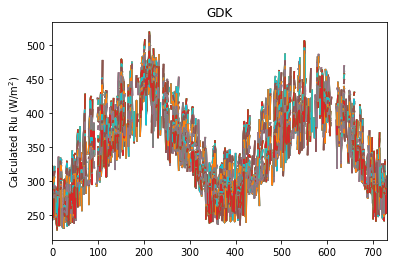

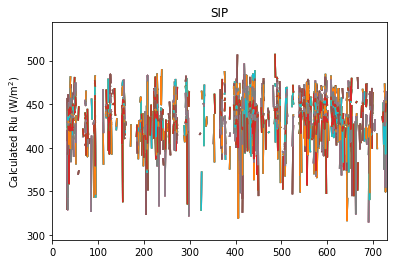

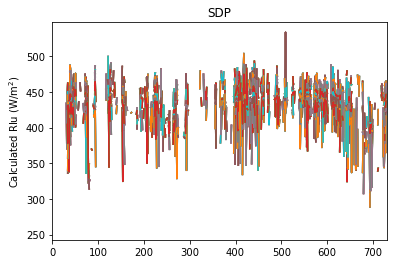

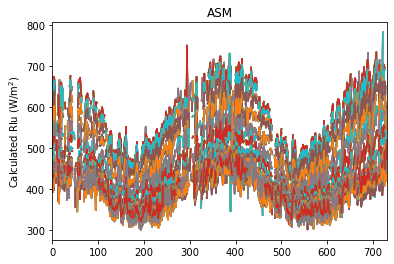

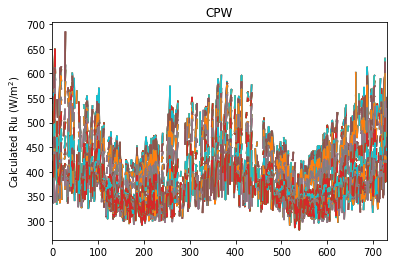

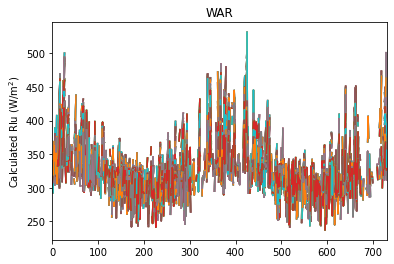

<Figure size 432x288 with 0 Axes>

In [4]:
WORKSPACE_FOLDER = os.path.join(os.path.abspath('..'), 'processing_record')
if not os.path.exists(WORKSPACE_FOLDER):
    os.makedirs(WORKSPACE_FOLDER)

for i, site_info in enumerate(site_infos):
    site_name = site_info[0]
    
    LST_SITE_CSV = os.path.join(WORKSPACE_FOLDER, site_name + '_AHI_LST.csv')
    lst_timelist, lst_10min = read_site_csv(LST_SITE_CSV)
    lst_10min_K = lst_10min + 273.15 # ℃ -> K
    EMIS_SITE_CSV = os.path.join(WORKSPACE_FOLDER, site_name + '_MOD21A1D_Emissivity_BBE.csv')
    emis_timelist, emis_10min = read_site_csv(EMIS_SITE_CSV)
    r_lu_10min = calculate_r_lu(emis_10min, lst_10min_K)
    
    r_lu_record = r_lu_10min.astype(str)
    r_lu_csv_ = numpy.column_stack((lst_timelist, r_lu_record))
    numpy.savetxt(os.path.join(WORKSPACE_FOLDER, site_name+'_Rlu'+'.csv'), r_lu_csv_, delimiter=",", fmt='%s')

    data_day = r_lu_10min.reshape(365 * 2, 24 * 6)
    
    plt.title(site_name)
    plt.plot(numpy.arange(365 * 2), data_day)
    plt.xlim(0, 365 * 2)
    plt.ylabel('Calculated Rlu (W/m$^{2}$)')
    plt.show()
    plt.clf()